In [1]:
import pandas as pd
import random
import numpy as np
from tqdm import tqdm
import ipdb
import re
import csv
import umap
from collections import Counter


import matplotlib.pyplot as plt
# import mplcursors
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid', context='notebook', rc={'figure.figsize':(14,10)}, font_scale=2)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set random seeds for reproducibility on a specific machine
random.seed(1)
np.random.seed(1)
np.random.RandomState(1)

RandomState(MT19937) at 0x7FC183C34040

UMAP(random_state=1, verbose=True)
Fri Sep 23 15:10:35 2022 Construct fuzzy simplicial set
Fri Sep 23 15:10:35 2022 Finding Nearest Neighbors
Fri Sep 23 15:10:35 2022 Building RP forest with 11 trees
Fri Sep 23 15:10:35 2022 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	Stopping threshold met -- exiting after 5 iterations
Fri Sep 23 15:10:37 2022 Finished Nearest Neighbor Search
Fri Sep 23 15:10:37 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Fri Sep 23 15:10:48 2022 Finished embedding


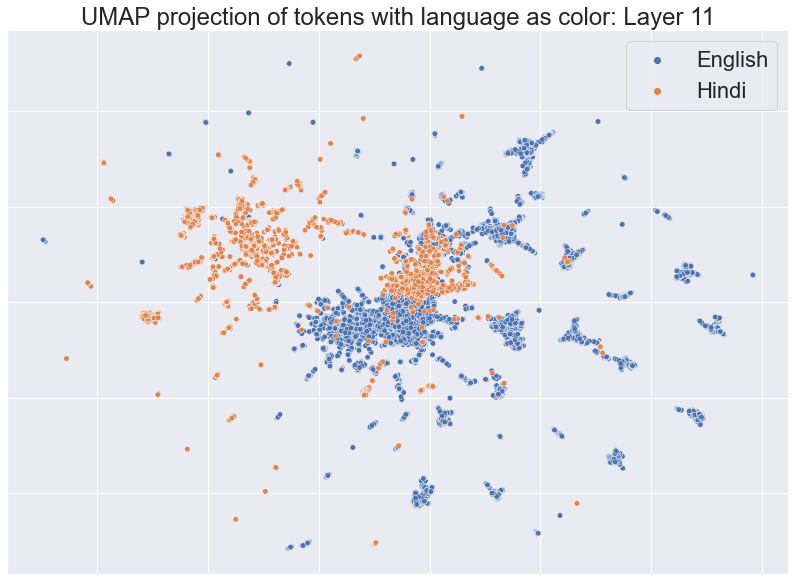

In [9]:
# Load the representations
reps_1 = np.load('../svm-code/mixed/reps_en_hi/EN_train.npy')
reps_2 = np.load('../svm-code/mixed/reps_en_hi/HI_train.npy')

lang = np.array([0 for i in range(reps_1.shape[0])] + [1 for i in range(reps_2.shape[0])])

reps_all = np.concatenate((reps_1,reps_2), axis=0)

# UMAP parameters
n_neighbors = 15
min_dist = 0.1
n_components = 2
metric = 'euclidean'

reducer = umap.UMAP(n_neighbors=n_neighbors,
                    min_dist=min_dist,
                    n_components=n_components,
                    metric=metric,
                    verbose=True,
                    random_state=1)
embedding = reducer.fit_transform(reps_all)

# %matplotlib notebook

legend_map = {0: 'English',
              1: 'Hindi'}

df = pd.DataFrame({'x':embedding[:, 0], 'y': embedding[:, 1], 'lang': lang})

ax = sns.scatterplot(x=df['x'], y=df['y'], hue=df['lang'].map(legend_map), s=30, legend='full')
plt.title(f'UMAP projection of tokens with language as color: Layer 11')

ax.set_xlabel('')
ax.set_ylabel('')

frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])

    
plt.legend()
# plt.savefig(f'UMAP-Layer-{layer}', transparent=True)